In [1]:
# Run this cell if you are using Google Colab
%%capture
! pip install arviz==0.11.00
! pip install pymc3==3.11.1

In [66]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy import stats

# Chapter 8 - Comparing Gaussian means
## 8.1 One-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

In [74]:
# Simulate some data
x = np.random.normal(0, 2, 300)

In [75]:
x = x / np.std(x)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, delta]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 6 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


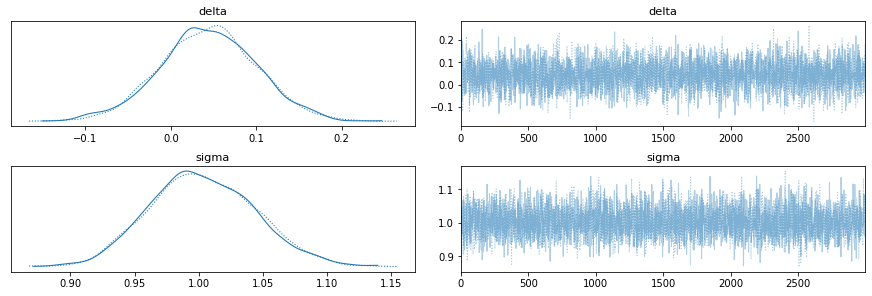

In [76]:
with pm.Model() as model1:
    delta = pm.Cauchy("delta", alpha=0.0, beta=0.707)
    sigma = pm.HalfCauchy("sigma", beta=1.0)

    miu = delta * sigma
    xi = pm.Normal("xi", mu=miu, sd=sigma, observed=x)

    trace1 = pm.sample(3000)

az.plot_trace(trace1);

In [77]:
az.summary(trace1)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
delta,0.044,0.057,-0.059,0.156,0.001,0.001,4614.0,3882.0,4605.0,4396.0,1.0
sigma,1.003,0.041,0.929,1.080,0.001,0.000,5389.0,5357.0,5444.0,4467.0,1.0


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


the Bayes Factor is 16.21 - (5.16 / 0.32)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


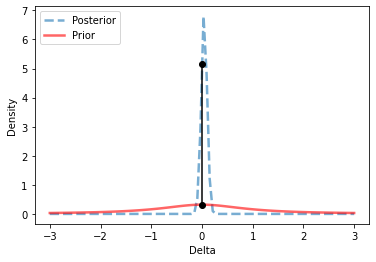

In [78]:
x = np.linspace(-3, 3, 100)

# BFs based on density estimation (using kernel smoothing instead of spline)

tmp = az.summary(trace1, var_names=["delta"])
# 95% confidence interval:
x0 = tmp["hdi_3%"]
x1 = tmp["hdi_97%"]

t_delt = trace1["delta"][:]
my_pdf = stats.kde.gaussian_kde(t_delt)

plt.plot(
    x, my_pdf(x), "--", lw=2.5, alpha=0.6, label="Posterior"
)  # distribution function
plt.plot(x, stats.cauchy.pdf(x), "r-", lw=2.5, alpha=0.6, label="Prior")

posterior = my_pdf(0)  # this gives the pdf at point delta = 0
prior = stats.cauchy.pdf(0)  # height of order-restricted prior at delta = 0
BF01 = posterior / prior
print(f"the Bayes Factor is {round(BF01[0], 2)} - ({round(posterior[0], 2)} / {round(prior, 2)})")

plt.plot(
    [0, 0],
    [posterior, prior],
    "k-",
    [0, 0],
    [posterior, prior],
    "ko",
    lw=1.5,
    alpha=1,
)
plt.xlabel("Delta")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()

## 8.2 Order-restricted one-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)_{\mathcal I(-∞,0)}$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \mu = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu,1/\sigma^2)$$

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, delta1]


Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 9 seconds.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


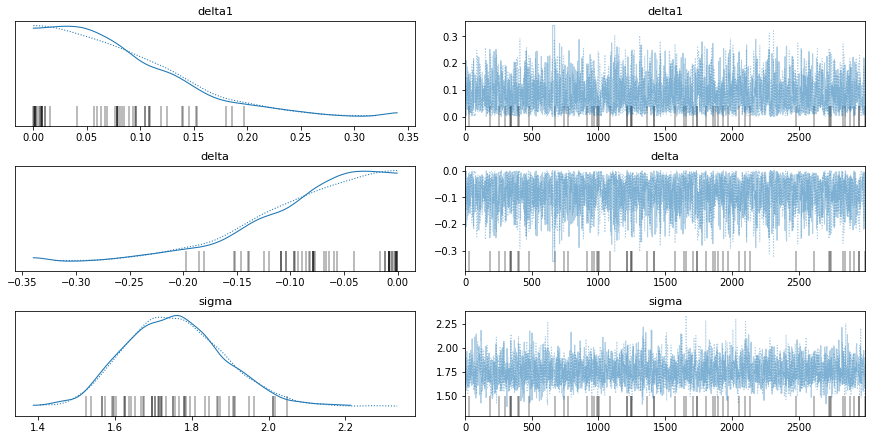

In [58]:
with pm.Model() as model2:
    delta1 = pm.HalfCauchy("delta1", beta=1.0)
    delta = pm.Deterministic("delta", -delta1)
    sigma = pm.HalfCauchy("sigma", beta=1.0)

    miu = delta * sigma
    xi = pm.Normal("xi", mu=miu, sd=sigma, observed=x)

    trace2 = pm.sample(3000, tune=2000)

az.plot_trace(trace2);

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


the Bayes Factor is 5.89 - (3.75 / 0.64)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


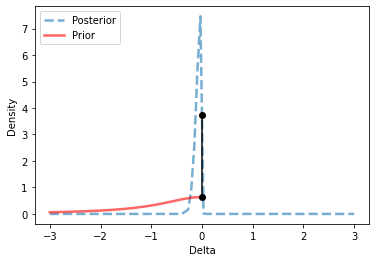

In [63]:
x = np.linspace(-3, 3, 100)

# BFs based on density estimation (using kernel smoothing instead of spline)

tmp = az.summary(trace2, var_names=["delta"])
# 95% confidence interval:
x0 = tmp["hdi_3%"]
x1 = tmp["hdi_97%"]

t_delt = trace2["delta"][:]
my_pdf = stats.kde.gaussian_kde(t_delt)

plt.plot(
    x, my_pdf(x), "--", lw=2.5, alpha=0.6, label="Posterior"
)  # distribution function
plt.plot(np.linspace(0, -3, 100), 
         stats.halfcauchy.pdf(np.linspace(0, 3, 100)), "r-", lw=2.5, alpha=0.6, label="Prior")

posterior = my_pdf(0)  # this gives the pdf at point delta = 0
prior = stats.halfcauchy.pdf(0)  # height of order-restricted prior at delta = 0
BF01 = posterior / prior
print(f"the Bayes Factor is {round(BF01[0], 2)} - ({round(posterior[0], 2)} / {round(prior, 2)})")

plt.plot(
    [0, 0],
    [posterior, prior],
    "k-",
    [0, 0],
    [posterior, prior],
    "ko",
    lw=1.5,
    alpha=1,
)
plt.xlabel("Delta")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()

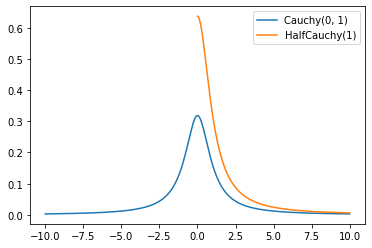

In [50]:
from scipy.stats import halfcauchy, cauchy

c = cauchy.pdf(np.linspace(-10, 10, 1000), 0, 1)
hc = halfcauchy.pdf(np.linspace(0, 10, 1000), 0, 1)

plt.plot(np.linspace(-10, 10, 1000), c, label='Cauchy(0, 1)')
plt.plot(np.linspace(0, 10, 1000), hc, label='HalfCauchy(1)')
plt.legend()

## 8.3 Two-sample comparison


$$ \delta \sim \text{Cauchy} (0, 1)$$
$$ \mu \sim \text{Cauchy} (0, 1)$$
$$ \sigma \sim \text{Cauchy} (0, 1)_{\mathcal I(0,∞)}$$
$$ \alpha = \delta\sigma $$
$$ x_{i} \sim \text{Gaussian}(\mu+\frac{\alpha}{2},1/\sigma^2)$$
$$ y_{i} \sim \text{Gaussian}(\mu-\frac{\alpha}{2},1/\sigma^2)$$


In [83]:
# Read data
x = np.array(
    [70, 80, 79, 83, 77, 75, 84, 78, 75, 75, 78, 82, 74, 81, 72, 70, 75, 72, 76, 77]
)
y = np.array(
    [56, 80, 63, 62, 67, 71, 68, 76, 79, 67, 76, 74, 67, 70, 62, 65, 72, 72, 69, 71]
)

n1 = len(x)
n2 = len(y)

# Rescale
y = y - np.mean(x)
y = y / np.std(x)
x = (x - np.mean(x)) / np.std(x)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu, delta]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 7 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


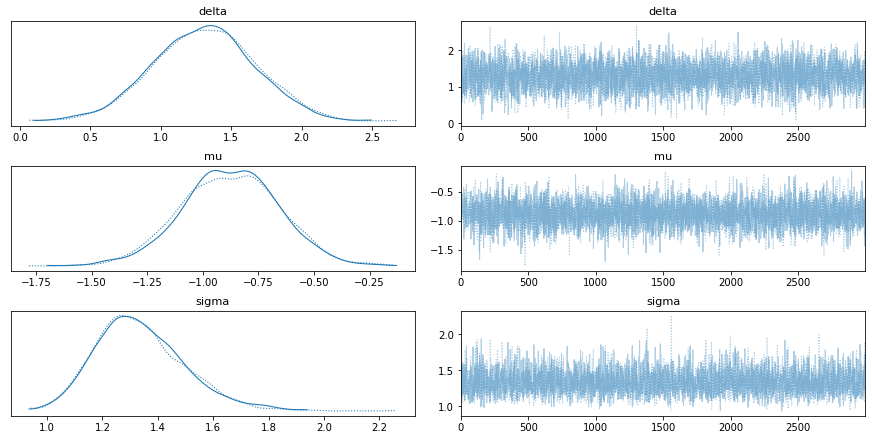

In [84]:
with pm.Model() as model3:
    delta = pm.Cauchy("delta", alpha=0, beta=1)
    mu = pm.Cauchy("mu", alpha=0, beta=1)
    sigma = pm.HalfCauchy("sigma", beta=1)

    alpha = delta * sigma
    xi = pm.Normal("xi", mu=mu + alpha / 2, sd=sigma, observed=x)
    yi = pm.Normal("yi", mu=mu - alpha / 2, sd=sigma, observed=y)

    trace3 = pm.sample(3000)

az.plot_trace(trace3);

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


the Bayes Factor is 0.0 - (0.0 / 0.32)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


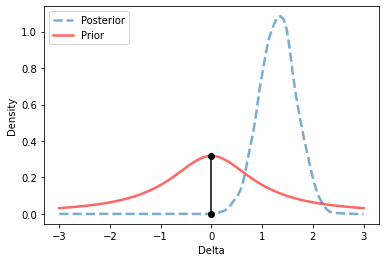

In [86]:
x = np.linspace(-3, 3, 100)

# BFs based on density estimation (using kernel smoothing instead of spline)

tmp = az.summary(trace3, var_names=["delta"])
# 95% confidence interval:
x0 = tmp["hdi_3%"]
x1 = tmp["hdi_97%"]

t_delt = trace3["delta"][:]
my_pdf = stats.kde.gaussian_kde(t_delt)

plt.plot(
    x, my_pdf(x), "--", lw=2.5, alpha=0.6, label="Posterior"
)  # distribution function
plt.plot(x, stats.cauchy.pdf(x), "r-", lw=2.5, alpha=0.6, label="Prior")

posterior = my_pdf(0)  # this gives the pdf at point delta = 0
prior = stats.cauchy.pdf(0)  # height of order-restricted prior at delta = 0
BF01 = posterior / prior
print(f"the Bayes Factor is {round(BF01[0], 2)} - ({round(posterior[0], 2)} / {round(prior, 2)})")

plt.plot(
    [0, 0],
    [posterior, prior],
    "k-",
    [0, 0],
    [posterior, prior],
    "ko",
    lw=1.5,
    alpha=1,
)
plt.xlabel("Delta")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()